In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from utils import *

%load_ext watermark
%watermark -iv -v

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

numpy     : 1.19.2
requests  : 2.25.1
json      : 2.0.9
matplotlib: 3.3.2
sys       : 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
pandas    : 1.1.5



### Load latest data

In [2]:
try:
    df = load_data()
    max_values = df.groupby('location').max('total_vaccinations_per_hundred').sort_values('total_vaccinations_per_hundred', ascending=False).reset_index(drop=False)
    print(','.join(sorted(df.location.unique().tolist())))
    display(df.sample(5))
except:
    warnings.warn('Cannot read vaccination data to pandas dataframe!')

Argentina,Austria,Bahrain,Bulgaria,Canada,Chile,China,Costa Rica,Croatia,Denmark,England,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Kuwait,Latvia,Lithuania,Luxembourg,Mexico,Northern Ireland,Oman,Poland,Portugal,Romania,Russia,Scotland,United Kingdom,United States,Wales,World


,location,date,total_vaccinations_per_hundred
103,Israel,2020-12-31,10.97
34,Canada,2020-12-30,0.23
206,Wales,2020-12-21,NaN
208,Wales,2020-12-23,NaN
123,Northern Ireland,2020-12-16,NaN


### Main countries

In [3]:
cmap = OrderedDict({k:main_country_vs_color[k] for k in [x for x in max_values.location if x in main_country_vs_color.keys()]})
print('Main countries:     ', ",".join(list(cmap.keys())))

Main countries:      Israel,Bahrain,United Kingdom,United States,China,Canada,Russia


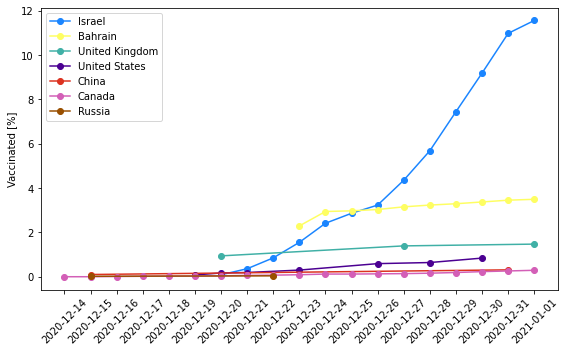

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 5))
plot_chart(ax, df[df.location.isin(cmap.keys())], cmap, 20)
plt.tight_layout()
plt.savefig('out/main-countries.png', dpi=160)
plt.show()

### European countries

European countries:  Denmark,Germany,Estonia,Luxembourg,Croatia,Portugal,Poland,Lithuania,Italy,Austria,Bulgaria,Romania,Hungary,Latvia,Greece,France


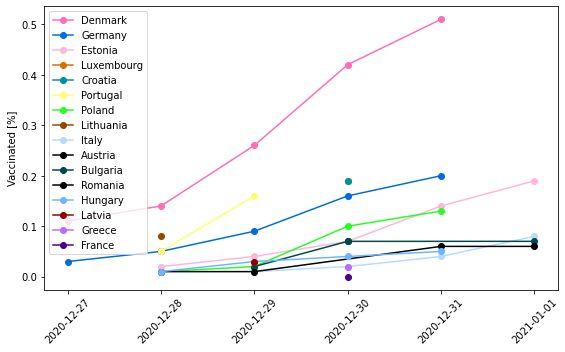

In [5]:
cmap = OrderedDict({k:european_country_vs_color[k] for k in [x for x in max_values.location if x in european_country_vs_color.keys()]})
print('European countries: ', ",".join(list(cmap.keys())))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 5))
plot_chart(ax, df[df.location.isin(cmap.keys())], cmap, 20)
plt.tight_layout()
plt.savefig('out/european-countries.png', dpi=160)
plt.show()